In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

In [17]:
dataset = pd.read_csv('gci_dataset_2019.csv',encoding='latin1')

In [18]:
X = dataset.iloc[:,1:3].applymap(lambda x: x.replace(',', '.')).astype(float)

In [19]:
CL = pd.DataFrame(dataset.iloc[:,0])

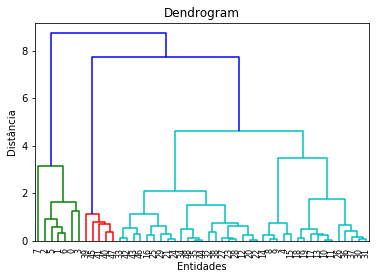

In [20]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Entidades')
plt.ylabel('Distância')
plt.show()

In [21]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

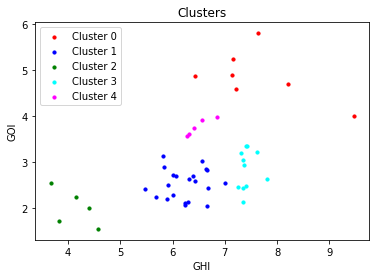

In [22]:
plt.scatter(X[y_hc == 0].GHI, X[y_hc == 0].GOI, s = 10, c = 'red', label = 'Cluster 0')
plt.scatter(X[y_hc == 1].GHI, X[y_hc == 1].GOI, s = 10, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_hc == 2].GHI, X[y_hc == 2].GOI, s = 10, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_hc == 3].GHI, X[y_hc == 3].GOI, s = 10, c = 'cyan', label = 'Cluster 3')
plt.scatter(X[y_hc == 4].GHI, X[y_hc == 4].GOI, s = 10, c = 'magenta', label = 'Cluster 4')
plt.title('Clusters')
plt.xlabel('GHI')
plt.ylabel('GOI')
plt.legend()
plt.show()

In [41]:
allocation = pd.concat([pd.DataFrame(CL),pd.DataFrame(y_hc),pd.DataFrame(X)], axis=1)
allocation.columns = ['CL', 'Cluster',"GHI","GOI"]
allocation
allocation.sort_values(allocation.columns[1])

,CL,Cluster,GHI,GOI
0,BELO HORIZONTE,0,7.63,5.81
1,BRASÍLIA,0,7.15,5.23
2,CURITIBA,0,6.42,4.86
3,SALVADOR,0,8.20,4.69
5,USP,0,7.22,4.58
6,VITÓRIA,0,7.13,4.90
7,ARACAJU,0,9.47,3.99
25,RIO DE JANEIRO,1,5.84,2.90
27,UBERLÂNDIA,1,6.42,2.58
28,VALE DO SAO FRANCISCO,1,6.39,2.69
